In [180]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [181]:
import os
import re
import matplotlib
import matplotlib.pyplot as plt
import glob
import math
import numpy as np
#import pandas as pd
from bisect import *
from decimal import Decimal
#from scipy.optimize import curve_fit
#import scipy.special as sps

In [182]:
def poi(lm, n) :
 a = np.empty([n])
 a[0] = math.exp(-lm)
 for j in range(1,n):
   a[j]=a[j-1]*lm/j
 return a

poi(1.,20)

array([3.67879441e-01, 3.67879441e-01, 1.83939721e-01, 6.13132402e-02,
       1.53283100e-02, 3.06566201e-03, 5.10943668e-04, 7.29919526e-05,
       9.12399408e-06, 1.01377712e-06, 1.01377712e-07, 9.21615563e-09,
       7.68012969e-10, 5.90779207e-11, 4.21985148e-12, 2.81323432e-13,
       1.75827145e-14, 1.03427732e-15, 5.74598513e-17, 3.02420270e-18])

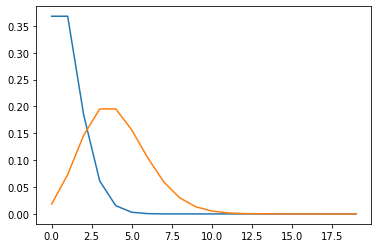

In [183]:
plt.plot(poi(1.,20))
plt.plot(poi(4.,20))
plt.show()

In [184]:
#https://gitlab.cern.ch/CLHEP/CLHEP/-/blob/develop/Random/src/RandPoissonQ.cc#L221
def poiGaus(lm,n) :
  
  sig2 = lm * (0.9998654 - 0.08346/lm);
  sigma = math.sqrt(sig2);
  t = 1./(sig2);

  a2 = t/6. + t*t/324.;
  a1 = math.sqrt (1.-2.*a2*a2*sig2);
  a0 = lm + 0.5 - sig2 * a2;
 
  # x = a0 + x*(a1*x +a2)
  
  A = 1./(sigma*math.sqrt(2.*3.14157))
  a = np.empty([n])
  for j in range(0,n):
    a[j] = 0
    for k in range(0,20) : 
      x = j +0.05*k + 0.5
      y = (math.sqrt(a1*a1-4*a2*(a0-x))-a1)/(2*a2)
      y = -0.5*y*y*t
      a[j] += A*math.exp(y)
    a[j] /= 20.
  return a
         
         
poiGaus(4.,20)

array([2.49847393e-02, 8.10673798e-02, 1.52335554e-01, 1.95934121e-01,
       1.90071251e-01, 1.47959185e-01, 9.64214833e-02, 5.42261966e-02,
       2.69208822e-02, 1.20054842e-02, 4.87575406e-03, 1.82335197e-03,
       6.33562741e-04, 2.06090422e-04, 6.31562049e-05, 1.83313974e-05,
       5.06289336e-06, 1.33585831e-06, 3.37905320e-07, 8.21928989e-08])

In [185]:
#https://www.johndcook.com/blog/wilson_hilferty/
def poiGausWH(lm,n) :
  A =0.0
  a = np.empty([n])
  for j in range(0,n):
    a[j] = 0
    for k in range(0,20) : 
      x = j +0.05*k - 0.5
      c = math.pow(lm/(1.+x),1./3.)
      mu = 1. - 1./(9*x+9)
      s = 1/(3*math.sqrt(1+x))
      y = (c-mu)/s
      a[j] += math.exp(-0.5*y*y)
    A+=a[j]
  a = a/A
  return a

In [186]:
#https://www.astesj.com/publications/ASTESJ_050249.pdf
def poiGausWH2(lm,n) :
  A =0.0
  a = np.empty([n])
  for j in range(0,n):
    a[j] = 0
    for k in range(0,20) : 
      x = j +0.05*k + 0.5
      x -= 1./3.
      x = math.pow(x,2./3.) - math.pow(lm,2./3.)
      x *= 3./(2.*math.pow(lm,1./6.))
      a[j] += math.exp(-0.5*x*x)
    A+=a[j]
  a = a/A
  return a    

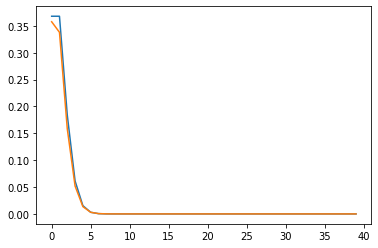

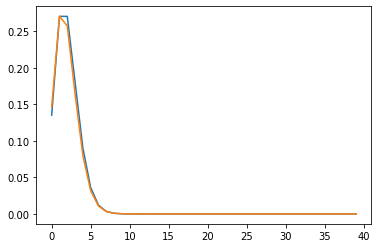

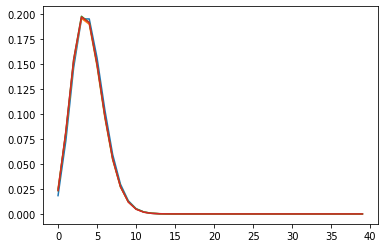

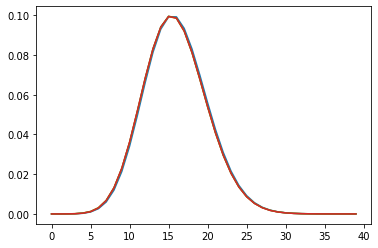

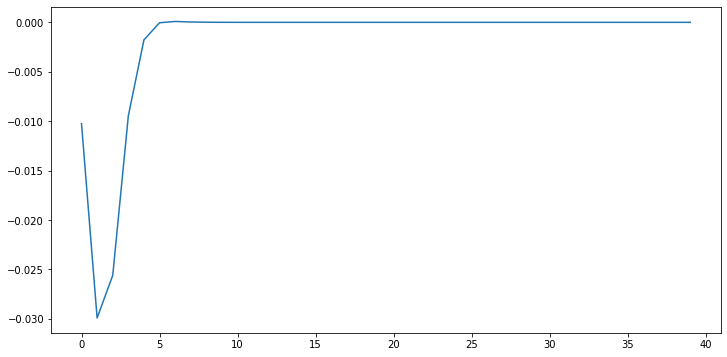

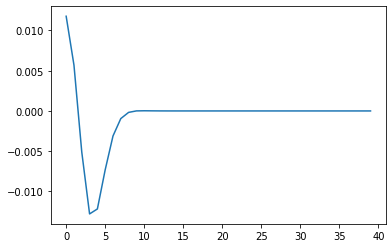

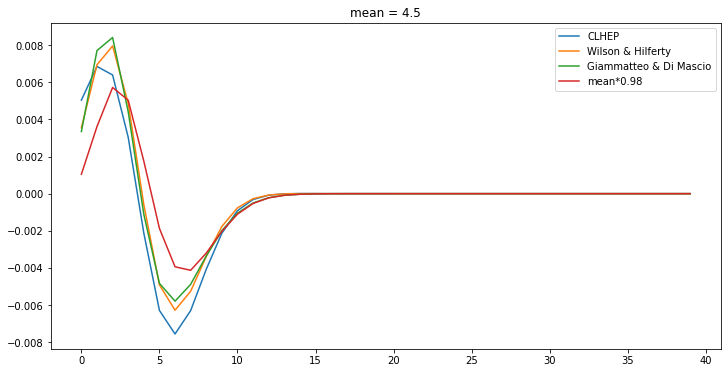

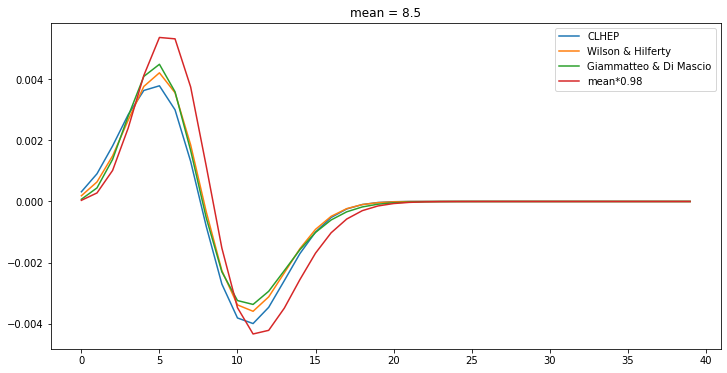

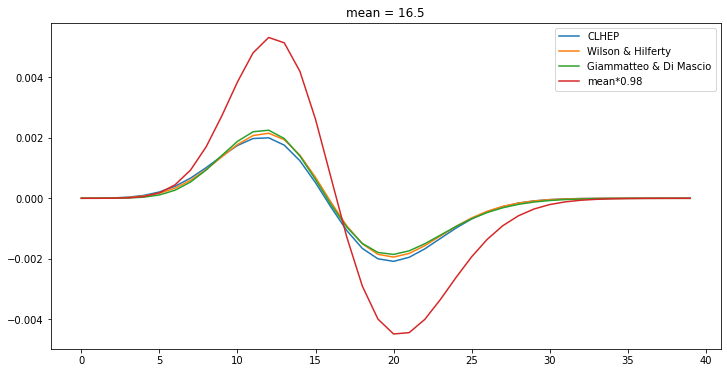

In [187]:
plt.plot(poi(1.,40))
plt.plot(poiGaus(1.,40))
plt.show()

plt.plot(poi(2.,40))
plt.plot(poiGaus(2.,40))
plt.show()

plt.plot(poi(4.,40))
plt.plot(poiGaus(4.,40))
plt.plot(poiGausWH(4.,40))
plt.plot(poiGausWH2(4.,40))
plt.show()


plt.plot(poi(16.,40))
plt.plot(poiGaus(16.,40))
plt.plot(poiGausWH(16.,40))
plt.plot(poiGausWH2(16.,40))
plt.show()

fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(poiGaus(1.,40)-poi(1.,40))
plt.show()
plt.plot(poiGaus(2.5,40)-poi(2.5,40))
plt.show()

fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(poiGaus(4.5,40)-poi(4.5,40), label="CLHEP")
plt.plot(poiGausWH(4.5,40)-poi(4.5,40), label="Wilson & Hilferty")
plt.plot(poiGausWH2(4.5,40)-poi(4.5,40),label="Giammatteo & Di Mascio")
plt.plot(poi(4.5*0.98,40)-poi(4.5,40), label="mean*0.98")
plt.title("mean = 4.5")
plt.legend(loc='upper right')
plt.show()
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(poiGaus(8.5,40)-poi(8.5,40), label="CLHEP")
plt.plot(poiGausWH(8.5,40)-poi(8.5,40), label="Wilson & Hilferty")
plt.plot(poiGausWH2(8.5,40)-poi(8.5,40),label="Giammatteo & Di Mascio")
plt.plot(poi(8.5*0.98,40)-poi(8.5,40), label="mean*0.98")
plt.title("mean = 8.5")
plt.legend(loc='upper right')
plt.show()
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(poiGaus(16.5,40)-poi(16.5,40), label="CLHEP")
plt.plot(poiGausWH(16.5,40)-poi(16.5,40), label="Wilson & Hilferty")
plt.plot(poiGausWH2(16.5,40)-poi(16.5,40),label="Giammatteo & Di Mascio")
plt.plot(poi(16.5*0.98,40)-poi(16.5,40), label="mean*0.98")
plt.title("mean = 16.5")
plt.legend(loc='upper right')
plt.show()

In [188]:
def plotH(N, mu,pk, p32,p21,p16) :
  truth = poi(mu,40)
  err = np.sqrt(N*truth)/N    
  fig, axs = plt.subplots(figsize=(12, 6))
  plt.plot((truth-truth), label="truth: 1 sigma")
  plt.plot((pk/N-truth), label="Knuth")  
  plt.plot((p32/N-truth), label="32 bits")
  plt.plot((p21/N-truth), label="21 bits")
  plt.plot((p16/N-truth), label="16 bits")
  plt.plot(poi(mu*0.9999,40)-truth, label="0.9999*mu")
  plt.fill_between(-err, err, alpha=0.6)
  #plt.ylim(0, 0.000001)
  #plt.xlim(0., 6.)
  # plt.yscale("log")
  plt.legend(loc='upper right')
  plt.show()

In [189]:
def plot05() :
  N = 2560000000
  mu =5.000e-01
#Knuth
  knuth = np.array([1552716295, 776354930, 194096024, 32350619, 4042361, 403501, 33724, 2394, 146, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ])
# 32 bits
  p32 = np.array([1552719689, 776355807, 194095648, 32346574, 4042230, 403679, 33881, 2335, 146, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ])
# 21 bits
  p21 = np.array([1552688424, 776379883, 194096004, 32350013, 4045311, 403736, 34203, 2426, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ])
# 16 bits
  p16 = np.array([1552755774, 776287712, 194114863, 32348891, 4063459, 390466, 38835, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ])
  plotH(N,mu,knuth, p32,p21,p16)

In [190]:
def plot125() :
  N = 2560000000
  mu =1.250e+01
#Knuth
  knuth = np.array([9365, 119481, 744011, 3104706, 9703360, 24267815, 50542689, 90275087, 141028628, 195865529, 244848390, 278240234, 289825237, 278685442, 248814271, 207354561, 162010843, 119121399, 82715191, 54418579, 34001354, 20243792, 11500893, 6248295, 3256209, 1628147, 783403, 362837, 162192, 69866, 29133, 11764, 4608, 1710, 646, 222, 78, 22, 8, 3, ])
#32 bits
  p32 = np.array([9403, 118950, 745718, 3107524, 9702604, 24250048, 50540201, 90276173, 141020013, 195882174, 244829841, 278236130, 289867972, 278674887, 248804364, 207353146, 161996913, 119120318, 82726257, 54423972, 34008032, 20244725, 11504995, 6249951, 3253435, 1627272, 782950, 363028, 161673, 69382, 29059, 11710, 4546, 1680, 603, 235, 78, 23, 10, 5, ])
# 21 bits
  p21 = np.array([10944, 119478, 743687, 3104418, 9702543, 24256444, 50541811, 90269763, 141039810, 195849913, 244844343, 278237846, 289829442, 278689460, 248856576, 207344828, 161989965, 119108146, 82723736, 54406552, 34019246, 20236163, 11509823, 6252983, 3259891, 1628128, 782540, 362446, 161958, 69455, 28216, 12134, 4908, 1186, 1218, 0, 0, 0, 0, 0, ])
# 16 bits
  p16 = np.array([38651, 116996, 742468, 3126716, 9688539, 24260014, 50548832, 90273765, 141032688, 195882227, 244853674, 278230695, 289817625, 278671616, 248799264, 207338673, 161999216, 119090415, 82749187, 54410039, 34024002, 20244703, 11481772, 6250420, 3279817, 1641516, 782107, 350743, 156249, 78420, 38951, 0, 0, 0, 0, 0, 0, 0, 0, 0, ])
  print(np.sum(p16)/N)
  plotH(N,mu,knuth,p32,p21,p16)

In [191]:
def plot45() :   
  N = 2560000000
  mu =4.500e+00
#Knuth
  knuth = np.array([28436855, 127947526, 287965668, 431932760, 485914763, 437317626, 327995465, 210844644, 118597320, 59296163, 26681608, 10910250, 4096595, 1418193, 455489, 136981, 38691, 10136, 2488, 568, 167, 36, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ])
#32 bits
  p32 = np.array([28436332, 127973646, 287932742, 431922700, 485938087, 437293451, 327988809, 210852079, 118603431, 59306362, 26682968, 10919055, 4088910, 1417409, 455931, 136362, 38443, 10079, 2466, 570, 133, 27, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ])
# 21 bits
  p21 = np.array([28434700, 127966758, 287939936, 431921094, 485890418, 437352478, 327994161, 210830193, 118608914, 59302402, 26679928, 10920089, 4097790, 1417272, 456193, 135248, 39047, 9759, 2411, 1209, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ])
# 16 bits
  p16 = np.array([28477317, 127964309, 287946476, 431922322, 485891428, 437338256, 327943254, 210853108, 118611861, 59296098, 26685550, 10898361, 4100578, 1446569, 428840, 156692, 38981, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ])
  plotH(N,mu,knuth, p32,p21,p16)

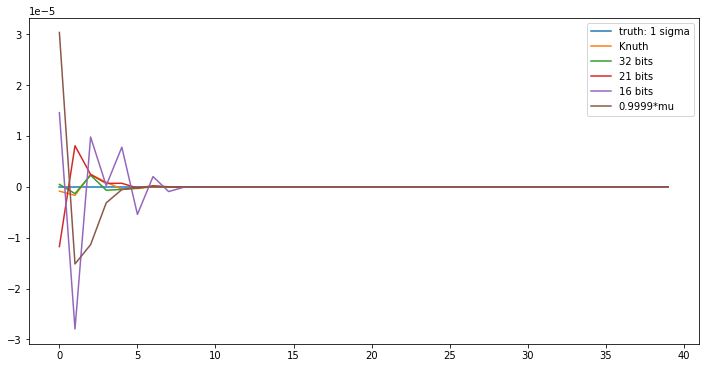

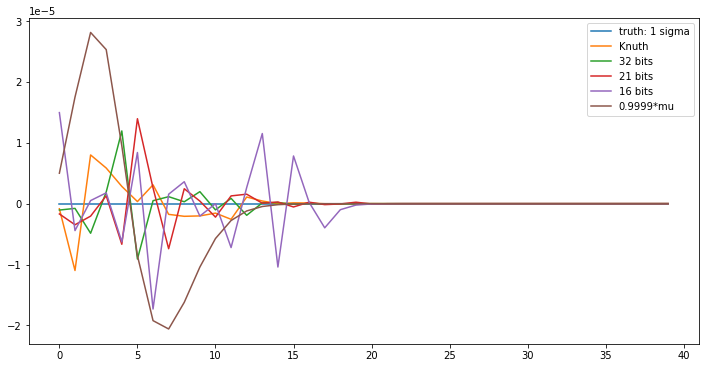

1.0


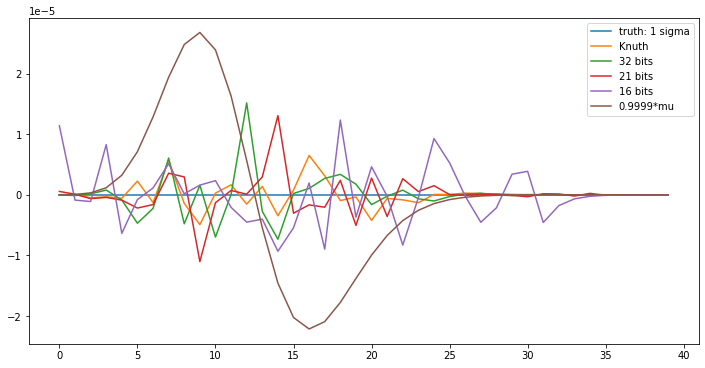

In [192]:
plot05()
plot45()
plot125()
